<a href="https://colab.research.google.com/github/Mercymerine/Machine_learning2/blob/main/SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SARIMA(p,d,q)(P,D,Q)m
# Seasonal Autoregressive Integrated Moving Averages
We have finally reached one of the most fascinating aspects of time series analysis: seasonality.

Where ARIMA accepts the parameters $(p,d,q)$, SARIMA accepts an <em>additional</em> set of parameters $(P,D,Q)m$ that specifically describe the seasonal components of the model. Here $P$, $D$ and $Q$ represent the seasonal regression, differencing and moving average coefficients, and $m$ represents the number of data points (rows) in each seasonal cycle.

<strong>NOTE:</strong> The statsmodels implementation of SARIMA is called SARIMAX. The “X” added to the name means that the function also supports <em>exogenous</em> regressor variables. We'll cover these in the next section.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install statsmodels

In [3]:
!pip install --upgrade statsmodels


In [4]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.9 MB/s eta 0:00:00


In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose # for ETS Plots
from pmdarima import auto_arima  # for determining ARIMA orders

In [7]:
import statsmodels.api as sm # Import the statsmodels library and assign the standard alias

In [8]:
#Loading the dataset
data = sm.datasets.co2.load_pandas()

In [9]:
#Print top five rows
y = data.data

In [10]:
y = y['co2'].resample('MS').mean()

In [11]:
y.head()

,co2
1958-03-01,316.100000
1958-04-01,317.200000
1958-05-01,317.433333
1958-06-01,NaN
1958-07-01,315.625000


In [12]:
y.isnull().sum()

5

In [13]:
#Using interpolation to deal with missing values
y= y.interpolate(method='linear')

In [14]:
y.isnull().sum()

0

In [15]:
y.head()

,co2
1958-03-01,316.100000
1958-04-01,317.200000
1958-05-01,317.433333
1958-06-01,316.529167
1958-07-01,315.625000


## **Plot the source data**

[Text(0.5, 0, ''), Text(0, 0.5, 'parts per million')]

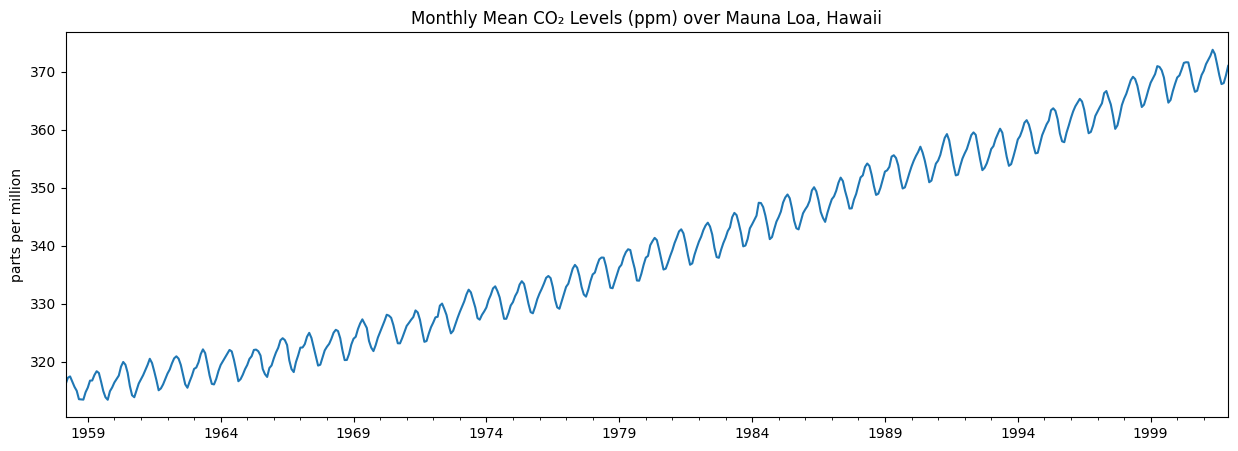

In [16]:
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='parts per million'
xlabel='' # we don't really need a label here

ax = y.plot(figsize=(15, 5), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

## **Run an ETS Decomposition**

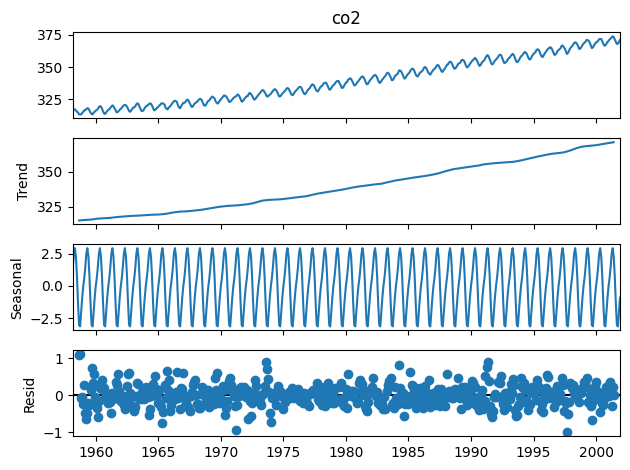

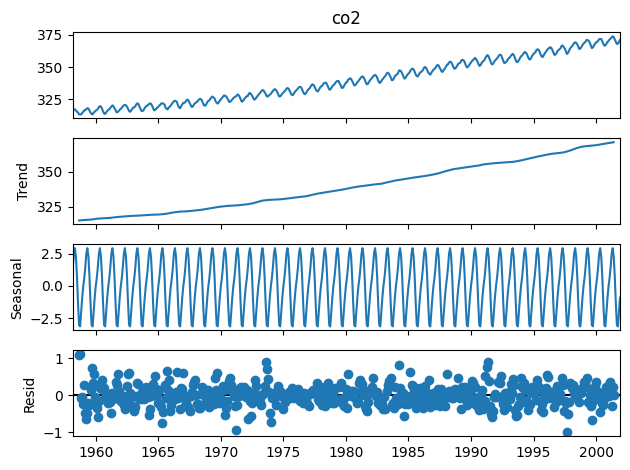

In [17]:
result = seasonal_decompose(y, model ='add')
result.plot()

Although small in scale compared to the overall values, there is a definite annual seasonality.

### Run <tt>pmdarima.auto_arima</tt> to obtain recommended orders
This may take awhile as there are a lot more combinations to evaluate.

In [18]:
# For SARIMA Orders we set seasonal=True and pass in an m value
auto_arima(y, seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  526
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -144.890
Date:                              Fri, 23 Aug 2024   AIC                            301.781
Time:                                      17:32:14   BIC                            327.361
Sample:                                  03-01-1958   HQIC                           311.797
                                       - 12-01-2001                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3116      0.041     -7.631      0.000      -0.392      -0.232
ma.L2         -0.0407      0.043     -0.946      0.344      -0.125       0.044
ma.L3         -0.1014      0.037     -2.768      0.006      -0.173      -0.030
ar.S.L12       0.9995      0.000   2283.343      0.000       0.999       1.000
ma.S.L12      -0.8601      0.028    -30.724      0.000      -0.915      -0.805
sigma2         0.0919      0.006     16.256      0.000       0.081       0.103
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.30
Prob(Q):                              0.93   Prob(JB):                         0.86
Heteroskedasticity (H):               0.84   Skew:                            -0.03
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## **Split the data into train/test sets**

In [86]:
len(y)

526

In [19]:
#Set one year for testing
train = y.iloc[:514]
test = y.iloc[514:]

## **Fit SARIMA(0, 1, 3)(1, 0, 1, 12) Model**

In [20]:
model = SARIMAX(train, order=(0, 1, 3), seasonal_order=(1, 0, 1, 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                  co2   No. Observations:                  514
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -142.177
Date:                              Fri, 23 Aug 2024   AIC                            296.354
Time:                                      17:39:52   BIC                            321.795
Sample:                                  03-01-1958   HQIC                           306.326
                                       - 12-01-2000                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3029      0.043     -7.126      0.000      -0.386      -0.220
ma.L2         -0.0328      0.047     -0.697      0.486      -0.125       0.059
ma.L3         -0.1169      0.034     -3.421      0.001      -0.184      -0.050
ar.S.L12       0.9995      0.000   2119.747      0.000       0.999       1.000
ma.S.L12      -0.8564      0.029    -29.824      0.000      -0.913      -0.800
sigma2         0.0920      0.006     15.790      0.000       0.081       0.103
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.29
Prob(Q):                              0.90   Prob(JB):                         0.87
Heteroskedasticity (H):               0.84   Skew:                            -0.02
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
#obtain predicted values
start = len(train)
end = len(train) + len(test) -1
predictions = results.predict(start=start, end=end,dynamic=False, type='levels').rename('SARIMA(0, 1, 3)(1, 0, 1, 12) Predictions')

Passing <tt>dynamic=False</tt> means that forecasts at each point are generated using the full history up to that point (all lagged values).

Passing <tt>typ='levels'</tt> predicts the levels of the original endogenous variables. If we'd used the default <tt>typ='linear'</tt> we would have seen linear predictions in terms of the differenced endogenous variables.

In [24]:
#Compare the predictions to expected values
for i in range(len(predictions)):
  print(f'predicted={predictions[i]:<11.10}, expected={test.iloc[i]}')

predicted=370.5200693, expected=370.175
predicted=371.2490095, expected=371.325
predicted=372.1926256, expected=372.06
predicted=373.4590868, expected=372.775
predicted=373.8501305, expected=373.79999999999995
predicted=373.305859 , expected=373.06
predicted=371.8309034, expected=371.3
predicted=369.7820093, expected=369.425
predicted=368.0474671, expected=367.88
predicted=368.2811713, expected=368.05
predicted=369.6425701, expected=369.375
predicted=371.0225452, expected=371.02


In [29]:
train.tail()

,co2
2000-08-01,367.950
2000-09-01,366.540
2000-10-01,366.725
2000-11-01,368.125
2000-12-01,369.440


In [30]:
test.head()

,co2
2001-01-01,370.175
2001-02-01,371.325
2001-03-01,372.060
2001-04-01,372.775
2001-05-01,373.800


[Text(0.5, 0, ''), Text(0, 0.5, 'parts per million')]

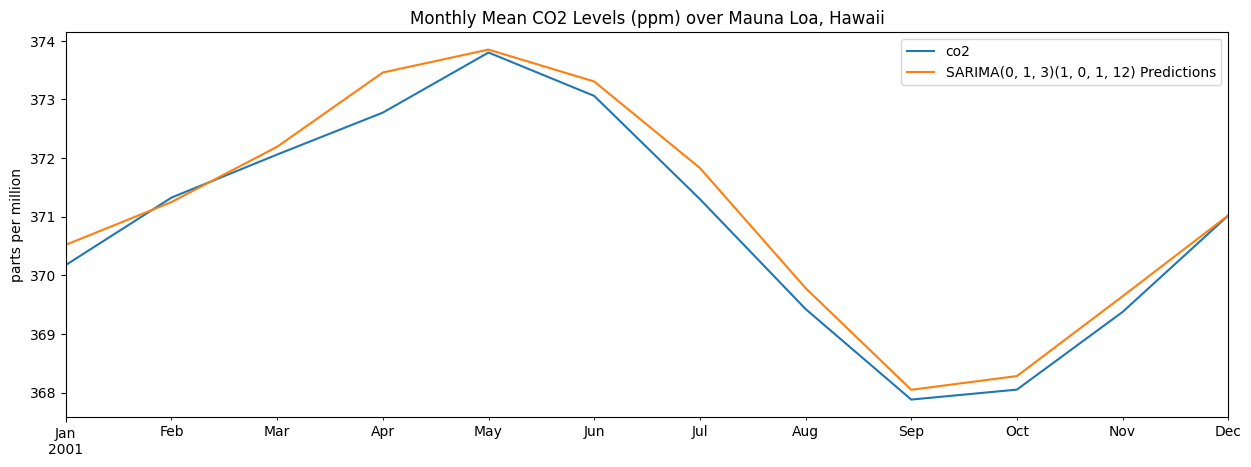

In [32]:
#Plot predictions against known  test values
title = 'Monthly Mean CO2 Levels (ppm) over Mauna Loa, Hawaii'
ylabel = 'parts per million'
xlabel = ''

ax = test.plot(figsize=(15, 5),legend=True, title=title)
#train.plot(ax=ax, style='k-')
predictions.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [ ]:
#Plot predictions against known  test values
title = 'Monthly Mean CO2 Levels (ppm) over Mauna Loa, Hawaii'
ylabel = 'parts per million'
xlabel = ''



## **Evaluate the Model**


In [33]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test, predictions)
print(f'SARIMA(0, 1, 3)(1, 0, 1, 12) MSE Error: {error:11.10}')

SARIMA(0, 1, 3)(1, 0, 1, 12) MSE Error: 0.1029809254


These are outstanding results!
### Retrain the model on the full data, and forecast the future

In [34]:
model = SARIMAX(y, order=(0, 1, 3), seasonal_order=(1, 0, 1, 12))
results = model.fit()
fcast = results.predict(len(y), len(y)+11, type='levels').rename('SARIMA(0, 1, 3)(1, 0, 1, 12) Forecast')

[Text(0.5, 0, ''), Text(0, 0.5, 'parts per million')]

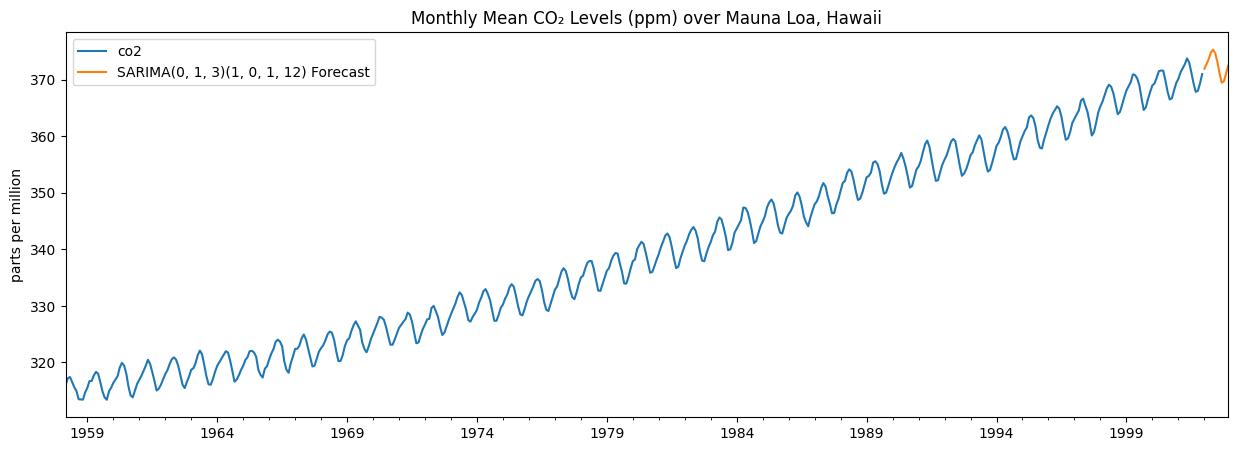

In [35]:
# Plot predictions against known values
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='parts per million'
xlabel=''

ax = y.plot(figsize=(15, 5), legend=True, title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)